In [ ]:
from google.colab import files #for google colab
import pandas as pd
import io
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the data, upload .xlsx
#import survey responses
uploaded = files.upload()
for filename in uploaded.keys():
      df_feature_engineering = pd.read_excel(io.BytesIO(uploaded[filename]))
      print(f"DataFrame from {filename}:")

Saving data_after_feature_engineering.xlsx to data_after_feature_engineering (1).xlsx
DataFrame from data_after_feature_engineering (1).xlsx:


In [ ]:
df_feature_engineering.head()

,Entrepreneur_Email,Resource_Name,is_recommended,Idea_Resource_Similarity_Score,interest_entr_s,interest_social_s,interest_coop_s,borough_brooklyn,borough_manhattan,borough_the_bronx,...,if_you_answered_yes_the_previous_question_please_tell_us.18,if_you_answered_yes_the_previous_question_please_tell_us.22,do_you_have_access_the_following_devices_complete_virt.1,do_you_have_access_the_following_devices_complete_virt.3,do_you_have_any_major_barriers_participating_in_entrepren.3,do_you_have_any_major_barriers_participating_in_entrepren.5,do_you_have_any_major_barriers_participating_in_entrepren.6,do_you_have_any_major_barriers_participating_in_entrepren.8,do_you_have_any_major_barriers_participating_in_entrepren.12,do_you_have_any_major_barriers_participating_in_entrepren.13
0,ba...23@gmail.com,REES Go-getters,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ba...23@gmail.com,REES Underground Entrepreneurs,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ba...23@gmail.com,SBS FastTrac® GrowthVenture™ for Veterans,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ba...23@gmail.com,BKPL PowerUP Competition,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ba...23@gmail.com,BKPL Ask a Librarian,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Analyze the target Value
df_feature_engineering['is_recommended'].value_counts(normalize=True)

,proportion
is_recommended,
0,0.821855
1,0.178145


The difference beterrn the output is high in the target variable

In [ ]:
#Analyze the primary feature 'NLP feature' by using
df_feature_engineering.groupby('is_recommended')['Idea_Resource_Similarity_Score'].mean()

,Idea_Resource_Similarity_Score
is_recommended,
0,0.000477
1,0.000000


In [ ]:
df_positive = df_feature_engineering[df_feature_engineering['is_recommended'] == 1]['Idea_Resource_Similarity_Score'].dropna()
df_negative = df_feature_engineering[df_feature_engineering['is_recommended'] == 0]['Idea_Resource_Similarity_Score'].dropna()

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

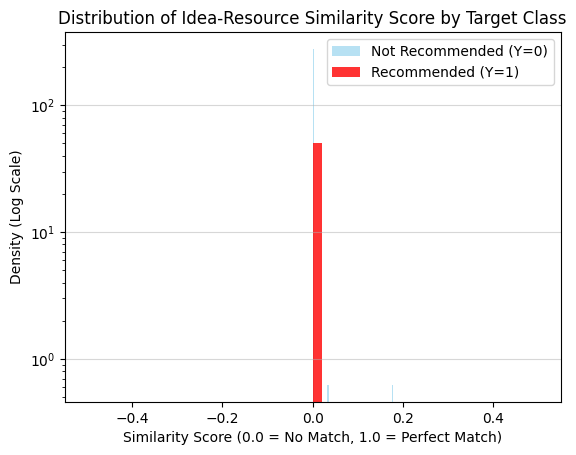

In [ ]:
plt.hist(
    df_negative,
    bins=50,
    alpha=0.6,
    label='Not Recommended (Y=0)',
    density=True,
    color='skyblue'
)

plt.hist(
    df_positive,
    bins=50,
    alpha=0.8,
    label='Recommended (Y=1)',
    density=True,
    color='red'
)

plt.yscale('log')
plt.title('Distribution of Idea-Resource Similarity Score by Target Class')
plt.xlabel('Similarity Score (0.0 = No Match, 1.0 = Perfect Match)')
plt.ylabel('Density (Log Scale)')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.show


In [ ]:
X = df_feature_engineering.drop(
    columns=['Entrepreneur_Email', 'Resource_Name', 'is_recommended']
)
X_numeric = X.select_dtypes(include=[np.number])
total_cells = X_numeric.shape[0] * X_numeric.shape[1]
total_zeros = (X_numeric == 0).sum().sum()

sparsity_percentage = (total_zeros / total_cells) * 100

print(sparsity_percentage)
if sparsity_percentage > 90:
    print("\nConclusion: The feature matrix is highly sparse.")

19.027854300581573
